In this notebook, we're gonna implement unsupervised machine learning algorithms especially the clustering ones. We'll also evaluate the algorithms using the Silhouette score.

# Clustering

## Preprocessing

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# loading dataset and displaying head
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# creating data subset by only taking the required columns for this analysis
df = df.iloc[:, [2,4]]
df_sub = df.copy()
df_sub.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


We're gonna group the customers based on their age and spending score.

## K-Means Clustering
We'll need to figure out the right value of k (number of clusters) but the centroids concept that this algorithm uses is worth trying.

In [ ]:
# training the model with multiple values of n_clusters (value of k) and calculating the wcss (used to implement the elbow method)
wcss = []
n_grps = list(range(1, 21))   # 1 to 10

# training  multiple models
for i in n_grps:
  k_model = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', random_state = 20)
  k_model.fit(df_sub)
  wcss.append(k_model.inertia_)

wcss

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23830.9603937729,
 19566.522341377604,
 15574.275461399942,
 13086.844865766416,
 11480.479023892774,
 10115.67923648992,
 9344.254089810158,
 8755.302813122551,
 7904.563148038852,
 7355.242956999142,
 6737.031288955284,
 6356.10608036829,
 5557.661007130126,
 5330.856569900687,
 4860.655634643133,
 4617.905418180031]

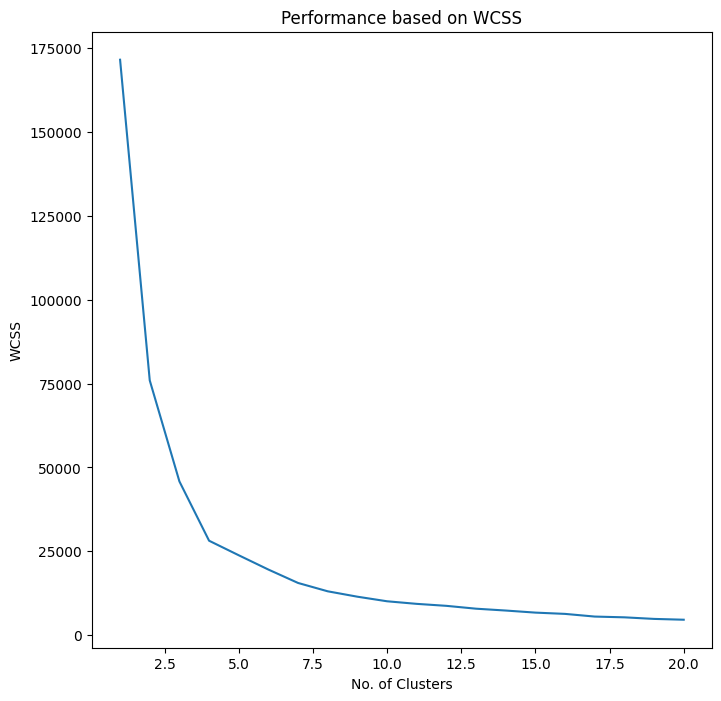

In [ ]:
# visualizing the performance
plt.plot(n_grps, wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Performance based on WCSS')
plt.show()

There is a sudden decrease in the wcss at clusters = 4. Let's use it.

In [ ]:
# creating k_model with 4 clusters
k_model = KMeans(n_clusters = 4, n_init = 10, init = 'k-means++', random_state = 20)
clusters = k_model.fit_predict(df_sub)
clusters

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
# appending the clusters assignment to the dataframe
df['K-cluster'] = clusters
df.head()

,Age,Spending Score (1-100),K-cluster
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

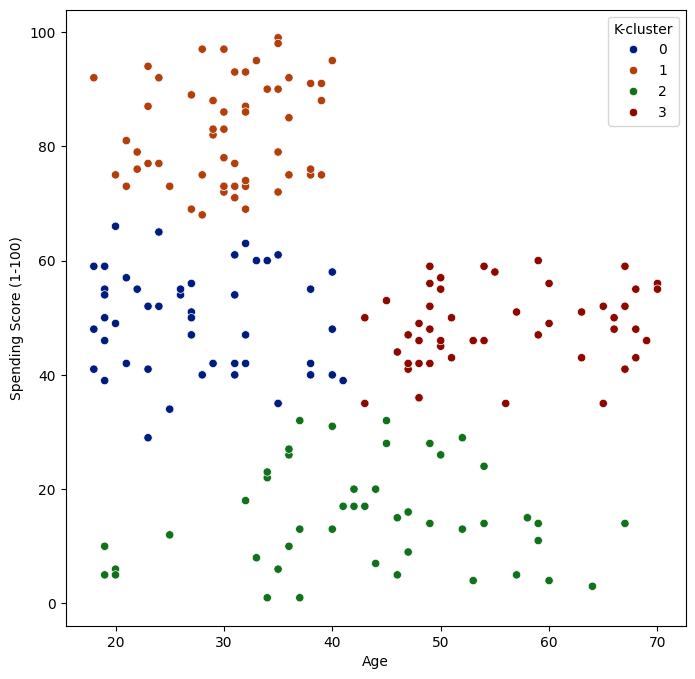

In [ ]:
# visualizing the results
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'K-cluster', palette = 'dark')

Here are the 4 clusters. Let's try DBSCAN clustering.

## DB-Scan Clustering
Automatically figures out the optimal number of cluters but we need to provide the epsilon and min_samples. Let's try.

In [ ]:
# training different models and choosing the one with best silhouette score
epss = [3, 5, 10, 15, 20]
n_min_smpls = [3, 5, 10, 20, 25]
results = []

# training multiple models with different values of eps and  min_samples
for eps in epss:
  for smpls in n_min_smpls:
    db_model = DBSCAN(eps = eps, min_samples = smpls)
    db_model.fit(df_sub)
    try:
      score = silhouette_score(df_sub, db_model.labels_)
      results.append([eps, smpls, score])
    except:
      results.append([eps, smpls, 0])


# creating a dataframe from the results and sorting using score and displaying head
db_df = pd.DataFrame(results, columns = ['Epsilon', 'Min_samples', 'Score'])
db_df = db_df.sort_values(by = 'Score', ascending = False).reset_index()
db_df.head()

,Epsilon,Min_samples,Score
13,10,20,0.387776
5,5,3,0.269702
12,10,10,0.265927
19,15,25,0.265927
6,5,5,0.181565


With an epsilon of 10 and min_samples of 20, the score is the highest. Let's try using these params for the DBSCAN model and see the clusters.

In [ ]:
# creating and training a DBSCAN model for the specified model
db_model = DBSCAN(eps = 10, min_samples = 20)
db_model.fit(df_sub)
db_model.labels_

DBSCAN(eps=10, min_samples=20)

In [ ]:
df

,Age,Spending Score (1-100),K-cluster
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

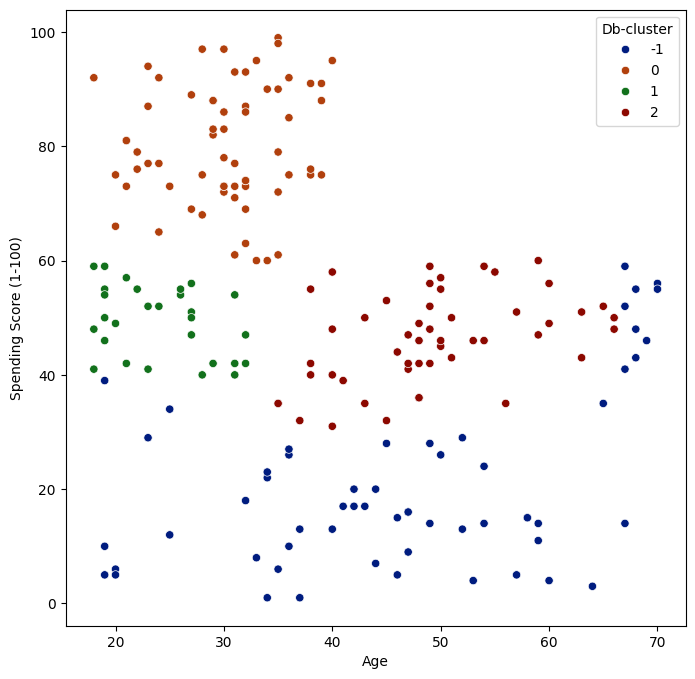

In [ ]:
# adding the results in the df
df['Db-cluster'] = db_model.labels_
# visulaizing the clusters
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'Db-cluster', palette = 'dark')

The algorithm defined many points are outliers i.e. the blue ones.

## Hierarchical / Agglomerative Clustering

In [ ]:
# creating multiple models and computing silhouette score, appending details to results and sorting the results df
results = []
for n in n_grps:
  hr_model = AgglomerativeClustering(n_clusters = n)
  hr_model.fit(df_sub)
  try:
    score = silhouette_score(df_sub, hr_model.labels_)
    results.append([n, score])
  except:
    results.append([n, score])

# creating df from results
df_hr = pd.DataFrame(results, columns = ['N_clusters', 'Score'])
df_hr = df_hr.sort_values(by = 'Score', ascending = False).reset_index(drop = True)
df_hr.head()

,N_clusters,Score
0,4,0.460250
1,2,0.454947
2,3,0.441179
3,7,0.415898
4,13,0.413988


We got highest score with 4 clusters. Let's train the final hr_model and visualize the clusters.

In [ ]:
# training the model
hr_model = AgglomerativeClustering(n_clusters = 4)
hr_model.fit(df_sub)
hr_model.labels_

AgglomerativeClustering(n_clusters=4)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

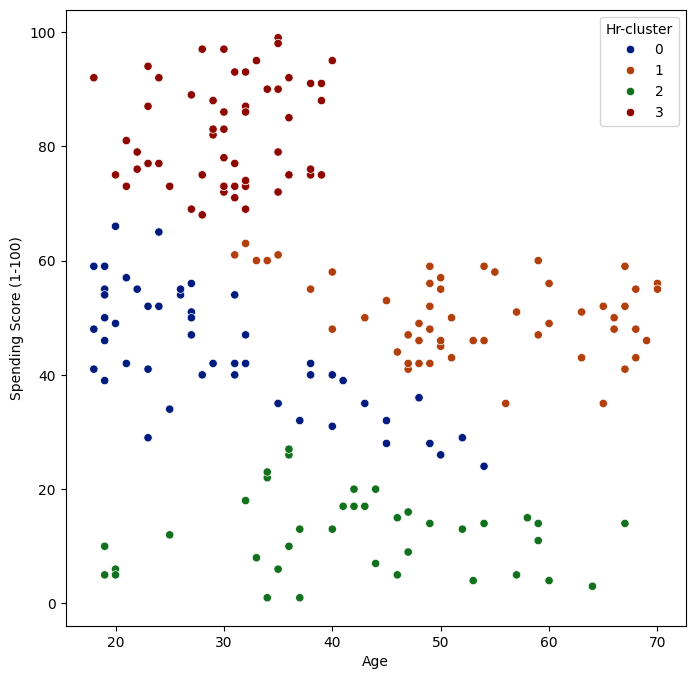

In [ ]:
# adding cluster results to df and visualizing
df['Hr-cluster'] = hr_model.labels_
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'Hr-cluster', palette = 'dark')

Here we've the clusters.

## Comparing models performance using Silhouette Score.

In [ ]:
# calculating performances of all the models
k_m_per = np.round(silhouette_score(df_sub, k_model.labels_), 3)
db_m_per = np.round(silhouette_score(df_sub, db_model.labels_), 3)
hr_m_per = np.round(silhouette_score(df_sub, hr_model.labels_), 3)

perfs = sorted({'K-Means': k_m_per, 'DB-Scan': db_m_per, 'Hierarchical': hr_m_per}.items(), key = lambda x: x[1], reverse = True)
# printing the performances
perfs

[('K-Means', 0.5), ('Hierarchical', 0.46), ('DB-Scan', 0.388)]

The K-Means model performed the best as compared to others.